In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import scipy
import matplotlib.animation as animation

Punto 1

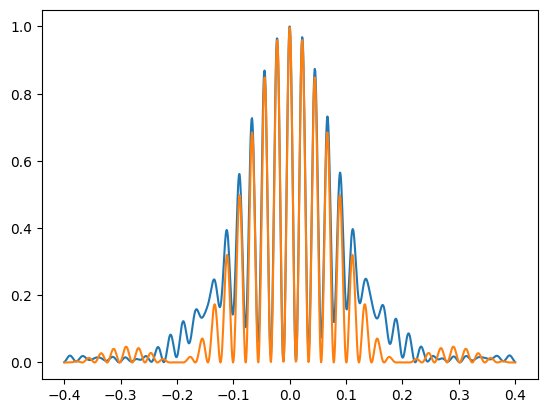

In [8]:

D1 = 30 
D2 = 30  
A = 0.1  
a = 0.01  
d = 0.09  
lambda_ = 670e-7  
N = 100000

z = np.linspace(-0.4, 0.4, 1000)
x = np.random.uniform(-A / 2, A / 2, N)
y =np.random.uniform(d/2-a/2,d/2+a/2,N)
y = y*np.random.choice([-1,1],size=N)


teta=np.arctan2(z,D2)
intensidad_clasica=((np.cos((np.pi*d*np.sin(teta))/lambda_))**2)*((np.sinc((a*np.sin(teta))/lambda_))**2)

def calcular_intensidad(x,y,z):
    suma=np.sum(np.exp(1j*2*np.pi*(D1+D2)/lambda_)*np.exp(1j*np.pi*((x-y)**2/D1/lambda_))*np.exp(1j*np.pi*((z-y)**2/D1/lambda_)))
    suma=np.abs(suma)**2
    intensidad = suma/N
    return intensidad

intensidades=np.zeros_like(z)
for i in range(len(z)):
    intensidades[i]=calcular_intensidad(x,y,z[i])

intensidades = intensidades/np.max(intensidades)

plt.plot(z, intensidades)
plt.plot(z,intensidad_clasica)
plt.show()


Punto 2

(<function figure at 0x119ac3e20>, np.float64(4.57765645905665), np.float64(3.3411008751304268))


<function matplotlib.pyplot.show(close=None, block=None)>

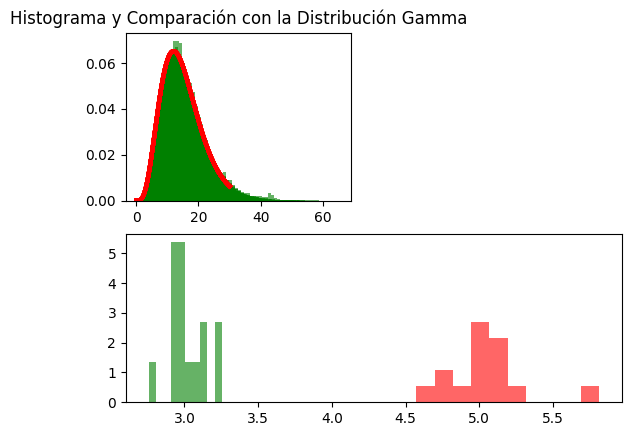

In [33]:

alpha = 5
beta = 3
N = 10000    

def metropolis(alpha,beta,N):

    muestras = np.zeros(N)   
    muestras[0] = np.random.rand()  
    funcion = lambda x: x**(alpha - 1) * np.exp(-x / beta) if x > 0 else 0

    for i in range(1, N):
        x_actual = muestras[i - 1]  
        x_propuesta = np.random.normal(x_actual, 1.0)  
        r = funcion(x_propuesta) / funcion(x_actual) if funcion(x_actual) > 0 else 1
        if np.random.rand() < r:
            muestras[i] = x_propuesta  
        else:
            muestras[i] = x_actual  
    fig=plt.figure
    plt.subplot(2, 2, 1) 
    plt.hist(muestras, bins=50, density=True, alpha=0.6, color='g')
    x = np.linspace(0, 30, 1000)
    plt.plot(x, scipy.stats.gamma.pdf(x,a=alpha, scale=beta), 'r-', lw=3)
    plt.title('Histograma y Comparación con la Distribución Gamma')
    plt.grid()

    params = scipy.stats.gamma.fit(muestras)  
    alpha_fit, beta_fit = params[0], params[2]
    return fig,alpha_fit,beta_fit


print(metropolis(alpha, beta, N))

Ns=np.random.uniform(100,1000000,15)
alphass=[]
betass=[]

for i in range(len(Ns)):
    M=metropolis(alpha, beta, round(Ns[i]))
    alphass.append(M[1])
    betass.append(M[2])
plt.subplot(2, 1, 2) 
plt.hist(alphass, density=True, alpha=0.6, color='r')
plt.hist(betass, density=True, alpha=0.6, color='g')
plt.show



Punto 3

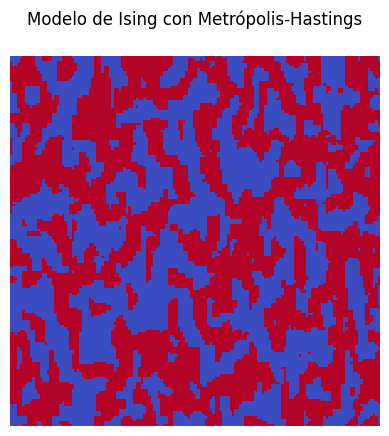

In [41]:
 

N = 150
J = 0.2
beta = 10

def initialize_spins(N):
    return np.random.choice([-1, 1], size=(N, N))

def energia(spins, i, j):
    return -J * spins[i, j] * (
        spins[(i + 1) % N, j] + spins[i, (j + 1) % N] +
        spins[(i - 1) % N, j]) -J*spins[i, (j - 1) % N]

def metropolis(spins):
    i = np.random.randint(0, N)
    j = np.random.randint(0, N)
    E_old_total = energia(spins, i, j)
    spins[i, j] *= -1
    E_new_total = energia(spins, i, j)
    delta_E = E_new_total - E_old_total
    if delta_E <= 0:
        return spins
    else:
        u = np.random.rand()
        if u <= np.exp(-beta * delta_E):
            return spins
        else:
            spins[i, j] *= -1
            return spins

def update(frame):
    global spins
    for _ in range(400):
        spins = metropolis(spins)
    mat.set_data(spins)
    return [mat]

spins = initialize_spins(N)
fig, ax = plt.subplots()
mat = ax.matshow(spins, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Modelo de Ising con Metrópolis-Hastings')
plt.axis('off')

ani = animation.FuncAnimation(fig, update, frames=500, interval=100, blit=True)

ani.save('modelo_ising_metropolis_.mp4', writer='ffmpeg', fps=30)
plt.show()
